First, I would like to wrangle all the datasets together so that it is easier to plot my graphs.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

nSG = pd.read_csv("../DATASETS/sg-no-CLEANSED.csv", on_bad_lines='skip')
oilW = pd.read_csv("../DATASETS/World-Oil-CLEANSED.csv", on_bad_lines='skip')
plasticW = pd.read_csv("../DATASETS/World-Plastic-CLEANSED.csv", on_bad_lines='skip')
nW = pd.read_csv("../DATASETS/World_NitrousOxide-CLEANSED.csv")
oilSG = pd.read_csv("../DATASETS/total-oil-consumption-by-sector-2009-to-2019.csv", on_bad_lines='skip')

In [2]:
nSG.rename(columns = {'year':'Year'}, inplace=True)
oilSG.rename(columns = {'year':'Year'}, inplace=True)
oilSG.rename(columns = {'sector':'Sector'}, inplace=True)
oilSG.rename(columns = {'oil_consump_ktoe' : 'SG_oil'}, inplace = True)
oilW.rename(columns = {'Oil Consumption - KTOE' : 'World_oil'}, inplace = True)

print(nSG.head())
print(oilW.head())
print(plasticW.head())
print(nW.head())
print(oilSG.head())


   Year  nitrogen_dioxide_mean   Sector
0  2000                     30  Overall
1  2001                     26  Overall
2  2002                     27  Overall
3  2003                     24  Overall
4  2004                     26  Overall
   Year  Entity   Sector    World_oil
0  1965  Africa  Overall  2934.331556
1  1966  Africa  Overall  3177.012640
2  1967  Africa  Overall  3165.307309
3  1968  Africa  Overall  3346.516423
4  1969  Africa  Overall  3412.922184
   Year               Entity  Per capita plastic waste (kg/person/day)  \
0  2010              Albania                                     0.069   
1  2010              Algeria                                     0.144   
2  2010               Angola                                     0.062   
3  2010             Anguilla                                     0.252   
4  2010  Antigua and Barbuda                                     0.660   

    Sector  
0  Overall  
1  Overall  
2  Overall  
3  Overall  
4  Overall  
   Year  

Next, I used the common columns, year and rows, as variables in order to use the pd function merge to combine all the datasets together.

In [3]:
df1 = nSG
df2 = oilW
df3 = plasticW
df4 = nW
df5 = oilSG

merged_df1_2 = pd.merge(df1, df2, on=['Year', 'Sector'], how='inner')
merged_df1_2_3_4 = pd.merge(merged_df1_2, df4, on=['Year', 'Sector'], how='inner')
df = pd.merge(merged_df1_2_3_4, df5, on=['Year', 'Sector'], how='inner')

print(df)


print(df['Year'])

        Year  nitrogen_dioxide_mean   Sector Entity_x      World_oil  \
0       2009                     22  Overall   Africa   16216.477214   
1       2009                     22  Overall   Africa   16216.477214   
2       2009                     22  Overall   Africa   16216.477214   
3       2009                     22  Overall   Africa   16216.477214   
4       2009                     22  Overall   Africa   16216.477214   
...      ...                    ...      ...      ...            ...   
232260  2019                     23  Overall    World  458887.618229   
232261  2019                     23  Overall    World  458887.618229   
232262  2019                     23  Overall    World  458887.618229   
232263  2019                     23  Overall    World  458887.618229   
232264  2019                     23  Overall    World  458887.618229   

           Entity_y  Total including LUCF    SG_oil  
0       Afghanistan          4.160000e+06  6,474.80  
1            Africa        

Firstly, I would like to find out if Singapore is environmentally friendly through looking at the annual oil consumption, and the trends that have occurred over the years.

   Year  sg_oil      world_oil
0  2009  6474.8  398723.697334
1  2010  7790.2  411823.508169
2  2011  7614.0  415371.074807
3  2012  7946.8  421416.225279
4  2013  8475.0  425796.698194
5  2014  8968.3  428481.857266
6  2015  9722.9  436769.217541
7  2016  9094.0  445062.570937
8  2017  8839.5  451552.390370
9  2018  8731.5  457872.914875


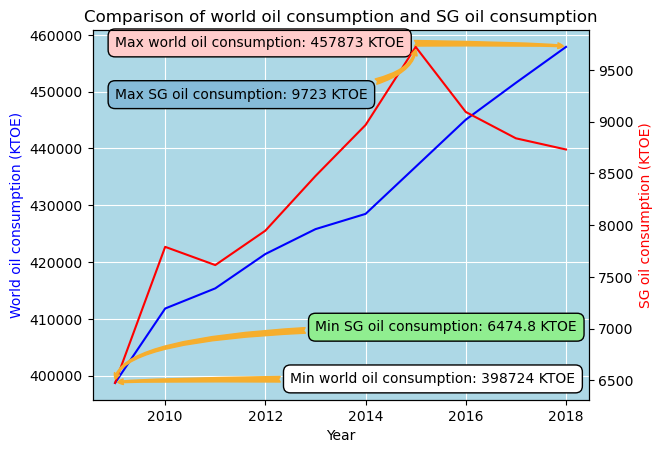

In [4]:
import os
os.getcwd()
import warnings
warnings.filterwarnings('ignore')

world_oil = df[df['Entity_x'] == 'World']

dfw_unique = world_oil.drop_duplicates(subset='Year')

world_oil = []
sg_oil = []

compare_df = pd.DataFrame(columns=['Year', 'sg_oil', 'world_oil'])

# Loop through the years
for year in range(2009, 2019):
    # Get the values for 'sg_oil' and 'world_oil' for the current year
    world_row = df[(df['Year'] == year) & (df['Entity_x'] == 'World')]
    sg_row = df[(df['Year'] == year) & (df['Entity_y'] == 'Singapore')]
    
    # If either row is empty, skip to the next iteration
    if world_row.empty or sg_row.empty:
        continue
    
    # Add a new row to the dataframe with the values for 'Year', 'sg_oil', and 'world_oil'
    compare_df = compare_df.append({'Year': year,
                                    'sg_oil': sg_row['SG_oil'].iloc[0],
                                    'world_oil': world_row['World_oil'].iloc[0]},
                                   ignore_index=True)

compare_df["sg_oil"] = compare_df["sg_oil"].str.replace(',', '').astype(float)
print(compare_df)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot world_oil on the left y-axis
ax.plot(compare_df['Year'], compare_df['world_oil'], color='blue')

# Create a second y-axis on the right side of the plot
ax2 = ax.twinx()

# Plot sg_oil on the right y-axis
ax2.plot(compare_df['Year'], compare_df['sg_oil'], color='red')

def annotateFunc(ax_subplot, anno_title, anno_xy, anno_xytext, anno_boxcolor, anno_color):
    ax_subplot.annotate(f'{anno_title}', xy=anno_xy, xytext=anno_xytext,
                        bbox=dict(facecolor=anno_boxcolor, boxstyle="round,pad=0.5"),
                        arrowprops=dict(arrowstyle="fancy",connectionstyle="angle3,angleA=0,angleB=-90",color=anno_color));

def backgroundGrid(ax_subplot):
    ax_subplot.grid(color="white")
    ax_subplot.set_axisbelow(True)
    ax_subplot.set_facecolor("lightblue")

# Add labels and a title
backgroundGrid(ax)
ax.set_xlabel('Year')
ax.set_ylabel('World oil consumption (KTOE)', color='blue')
ax2.set_ylabel('SG oil consumption (KTOE)', color='red')
plt.title('Comparison of world oil consumption and SG oil consumption')

#get earliest and latest year in dataset
earliestYr = compare_df['Year'].min()
latestYr = compare_df['Year'].max()

startYear = earliestYr
# Annotate the maximum value of sg_oil
max_sg_oil = compare_df['sg_oil'].max()
max_sg_year = compare_df[compare_df['sg_oil'] == max_sg_oil]['Year'].values[0]
annotateFunc(ax2, f"Max SG oil consumption: {max_sg_oil:.0f} KTOE",
             (max_sg_year, max_sg_oil), (earliestYr, max_sg_oil - 500), "#86BBD8", "#F6AE2D")

# Annotate the minimum value of sg_oil
min_sg_oil = compare_df['sg_oil'].min()
min_sg_year = compare_df[compare_df['sg_oil'] == min_sg_oil]['Year'].values[0]
annotateFunc(ax2, f'Min SG oil consumption: {min_sg_oil} KTOE', (earliestYr, min_sg_oil + 10), (earliestYr + 4, min_sg_oil + 500), "#90EE90", "#F6AE2D")

# Annotate the maximum value of world_oil
max_world_oil = compare_df['world_oil'].max()
max_world_year = compare_df[compare_df['world_oil'] == max_world_oil]['Year'].values[0]
annotateFunc(ax, f"Max world oil consumption: {max_world_oil:.0f} KTOE",
             (max_world_year, max_world_oil), (earliestYr, max_world_oil),  "#FFCCCB", "#F6AE2D")

# Annotate the minimum value of world_oil
min_world_oil = compare_df['world_oil'].min()
min_world_year = compare_df[compare_df['world_oil'] == min_world_oil]['Year'].values[0]
annotateFunc(ax, f"Min world oil consumption: {min_world_oil:.0f} KTOE",
             (min_world_year, min_world_oil), (earliestYr + 3.5, min_world_oil), "white", "#F6AE2D")

# Show the plot
plt.show()


Next, I would like to plot Singapore against the other regions around the world to see if we are on par with the trends of emission of nitrous oxide of other regions. Through using drop duplicates, I can ensure that no error from the dataset (if available) will be carried on.

In [54]:
df123 = pd.DataFrame()
df123['Year'] = df.loc[:, 'Year']
df123['Entity_y'] = df.loc[:, 'Entity_y']
df123['Total including LUCF'] = df.loc[:, 'Total including LUCF']

asia = df123[df123['Entity_y'] == 'Asia'].drop_duplicates(subset='Year')
af = df123[df123['Entity_y'] == 'Africa'].drop_duplicates(subset='Year')
eu = df123[df123['Entity_y'] == 'Europe'].drop_duplicates(subset='Year')
na = df123[df123['Entity_y'] == 'North America'].drop_duplicates(subset='Year')
au = df123[df123['Entity_y'] == 'Australia'].drop_duplicates(subset='Year')
sa = df123[df123['Entity_y'] == 'South America'].drop_duplicates(subset='Year')
sg = df123[df123['Entity_y'] == 'Singapore'].drop_duplicates(subset='Year')

df_final = pd.concat([af, eu, na,sa])


Next, I would like to use confidence interval in order to see the accuracy and spread of the data. I plotted the regions and Singapore differently in order to properly see the difference instead of crowding the data, which may mix up my analysis.

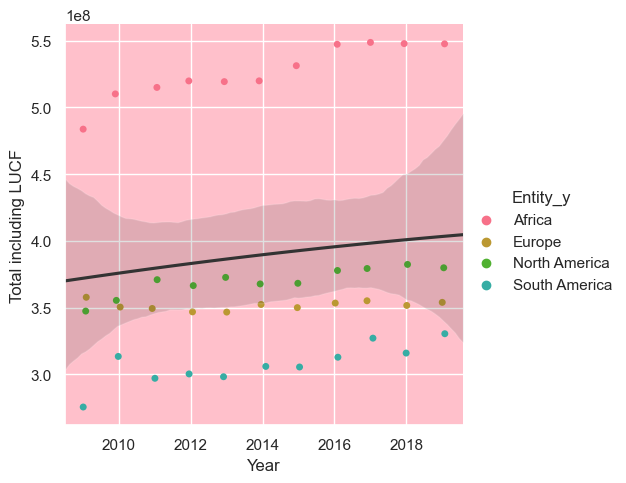

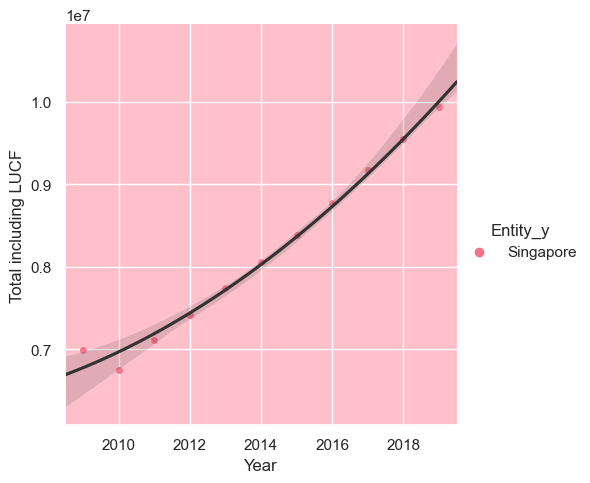

In [64]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_style("darkgrid", {"axes.facecolor": "pink"})
sns.set_palette("husl")

sns.catplot(
    data=df_final, x="Year", y="Total including LUCF", hue="Entity_y",
    native_scale=True, zorder=1
)
sns.regplot(
    df_final, x="Year", y="Total including LUCF",
    scatter=False, truncate=False, order=2, color=".2",
)


sns.catplot(
    data=sg, x="Year", y="Total including LUCF", hue="Entity_y",
    native_scale=True, zorder=1
)
sns.regplot(
    sg, x="Year", y="Total including LUCF",
    scatter=False, truncate=False, order=2, color=".2",
)

fig.show()

Next, using simple linear regression, I am able to see the future progress of the nitrous oxide emissions in Singapore. Furthermore, I labelled the predicted value as I wanted to see the final result of the increase in emissions.

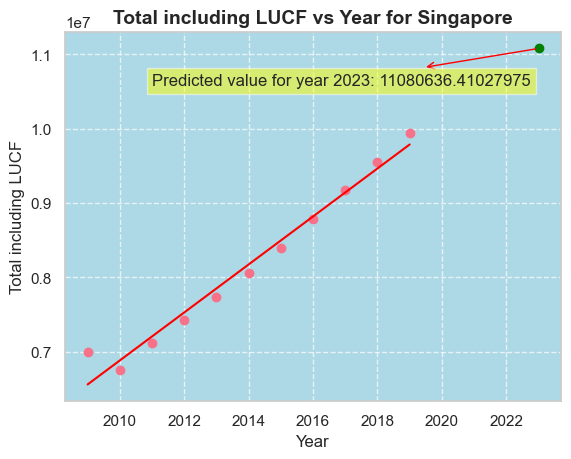

In [77]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots()

X = sg['Year'].values.reshape(-1, 1)
y = sg['Total including LUCF'].values.reshape(-1, 1)

reg = LinearRegression().fit(X, y)

y_pred = reg.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Year')
plt.ylabel('Total including LUCF')

# Predict the next value
new_year = np.array([[2023]])
prediction = reg.predict(new_year)

sns.set_style('whitegrid')

def annotateFunc(ax_subplot, anno_title, anno_xy, anno_xytext, anno_boxcolor, anno_color):
    ax_subplot.annotate(f'{anno_title}', xy=anno_xy, xytext=anno_xytext,
                        bbox=dict(facecolor=anno_boxcolor, boxstyle="round,pad=0.5"),
                        arrowprops=dict(arrowstyle="fancy",connectionstyle="angle3,angleA=0,angleB=-90",color=anno_color));

def backgroundGrid(ax_subplot):
    ax_subplot.grid(color="white")
    ax_subplot.set_axisbelow(True)
    ax_subplot.set_facecolor("lightblue")

backgroundGrid(ax)
# Plot the predicted value
plt.scatter(new_year, prediction, color='green')

# Annotate the predicted value
ax.annotate(f'Predicted value for year {new_year[0][0]}: {prediction[0][0]}', 
            xy=(new_year, prediction), xytext=(new_year - 12, prediction-500000),
            bbox=dict(facecolor='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle="<-", color='red'))

# Add a grid to the plot
plt.grid(linestyle='--', alpha=0.7)

# Add labels to the x and y-axis
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total including LUCF', fontsize=12)

# Add a title to the plot
plt.title('Total including LUCF vs Year for Singapore', fontsize=14, fontweight='bold')


plt.show()

Finally, to see if Singapore is environmentally friendly, I would like to see our plastic usage over the years. By randomising the countries, I think that I would get a fair analysis through random sampling against countries around the world instead of pre determining the countries

     Year               Entity  Per capita plastic waste (kg/person/day)  \
0    2010              Albania                                     0.069   
1    2010              Algeria                                     0.144   
2    2010               Angola                                     0.062   
3    2010             Anguilla                                     0.252   
4    2010  Antigua and Barbuda                                     0.660   
..    ...                  ...                                       ...   
181  2010              Uruguay                                     0.252   
182  2010              Vanuatu                                     0.295   
183  2010            Venezuela                                     0.252   
184  2010              Vietnam                                     0.103   
185  2010                Yemen                                     0.103   

      Sector   average  
0    Overall  0.179812  
1    Overall  0.179812  
2    Overall

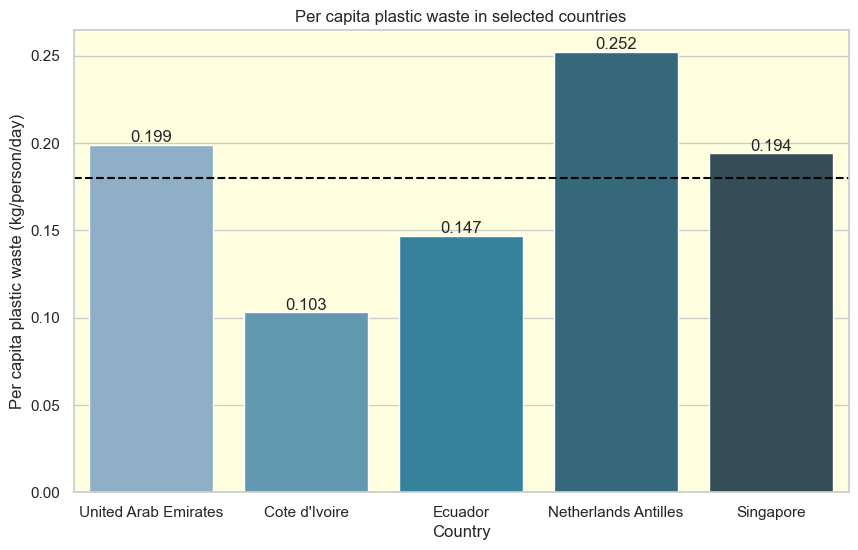

In [175]:
print(plasticW)

import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes object to plot on
# fig, ax = plt.subplots(figsize=(8,6))

# Calculate the average of the "Per capita plastic waste (kg/person/day)" column
average = df3["Per capita plastic waste (kg/person/day)"].mean()

# Create a new dataframe with just the row for Singapore
singapore = df3[df3["Entity"] == "Singapore"].copy()

# Add a new column to the Singapore dataframe with the average value
singapore["Average"] = average
mean = df3["Per capita plastic waste (kg/person/day)"].mean()


# find the average of per capita plastic waste
mean = df3["Per capita plastic waste (kg/person/day)"].mean()

# create a new column with average values
df3['average'] = mean

# randomly select 4 other countries besides Singapore
other_countries = df3[df3.Entity != 'Singapore'].sample(4)

# concat the random 4 countries and Singapore
selected_countries = pd.concat([other_countries, df3[df3.Entity == 'Singapore']])

# plot the barplot
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.gca().set_facecolor("lightyellow") # set background color to light green
sns.barplot(x='Entity', y='Per capita plastic waste (kg/person/day)', data=selected_countries, 
            palette=sns.color_palette("PuBuGn_d", 5))

# Add text labels to the bars
for i in range(len(selected_countries)):
    value = selected_countries.iloc[i]["Per capita plastic waste (kg/person/day)"]
    plt.text(i, value, str(value), ha='center', va='bottom')

# add horizontal line for average
plt.axhline(y=mean, color='black', linestyle='--')

plt.title("Per capita plastic waste in selected countries")
plt.xlabel("Country")
plt.ylabel("Per capita plastic waste (kg/person/day)")

plt.show()